In [2]:
import numpy as np
import pandas as pd
import datetime as datetime
from datetime import datetime
import requests
import os
import json
from dotenv import load_dotenv
import matplotlib
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
load_dotenv()

True

In [4]:
FMP_API_KEY = os.getenv('FMP_API_KEY')

In [5]:
# Specify stock ticker and index
company = 'TSM'
index = '^GSPC'

# Company Overview

In [6]:
url = f'https://financialmodelingprep.com/api/v3/profile/{company}?apikey={FMP_API_KEY}'
overview = requests.get(url).json()
overview = pd.DataFrame(overview)
overview = overview.set_index('symbol').T
overview

symbol,TSM
price,111.65
beta,1
volAvg,7967595
mktCap,579025829888
lastDiv,1.72511
range,80.61-142.2
changes,0.0299988
companyName,Taiwan Semiconductor Manufacturing Company Lim...
currency,USD
cik,0001046179


# Company Description

In [7]:
# Company description 
url = f'https://financialmodelingprep.com/api/v4/company-outlook?symbol={company}&apikey={FMP_API_KEY}'
overview = requests.get(url).json()
overview = overview['profile']['description']
overview

'Taiwan Semiconductor Manufacturing Company Limited manufactures and sells integrated circuits and semiconductors. It also offers customer service, account management, and engineering services. The company serves customers in computer, communications, consumer, and industrial and standard segments in North America, Europe, Japan, China, and South Korea. Taiwan Semiconductor Manufacturing Company Limited was founded in 1987 and is headquartered in HsinChu, Taiwan.'

# Company Performance

In [40]:
start = '2011-01-01'
end = '2021-09-30'

In [41]:
# Pull company historical performance
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{company}?apikey={FMP_API_KEY}&from={start}&to={end}'
historical = requests.get(url).json()
historical = pd.DataFrame.from_dict(historical, orient='index')
historical = historical[0][1]
historical = pd.DataFrame(historical)
historical['date'] = pd.to_datetime(historical['date'])
historical = historical.set_index('date')
historical['symbol'] = company
historical['daily_ret'] = historical['adjClose'].pct_change().dropna()
historical[:1]

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol,daily_ret
date,,,,,,,,,,,,,,
2021-09-30,112.43,113.35,111.65,111.65,111.65,5900742.0,5900742.0,-0.78,-0.694,112.21667,"September 30, 21",-0.00694,TSM,NaN


In [42]:
# Pull index historical performance
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{index}?apikey={FMP_API_KEY}&from={start}&to={end}'
historical_sp = requests.get(url).json()
historical_sp = pd.DataFrame.from_dict(historical_sp, orient='index')
historical_sp = historical_sp[0][1]
historical_sp = pd.DataFrame(historical_sp)
historical_sp['date'] = pd.to_datetime(historical_sp['date'])
historical_sp = historical_sp.set_index('date')
historical_sp['symbol'] = index
historical_sp['daily_ret'] = historical_sp['adjClose'].pct_change().dropna()
historical_sp[:1]

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol,daily_ret
date,,,,,,,,,,,,,,
2021-09-30,4370.669922,4382.549805,4306.240234,4307.540039,4307.540039,2.274998e+09,2.274998e+09,-63.12988,-1.444,4332.11003,"September 30, 21",-0.01444,^GSPC,NaN


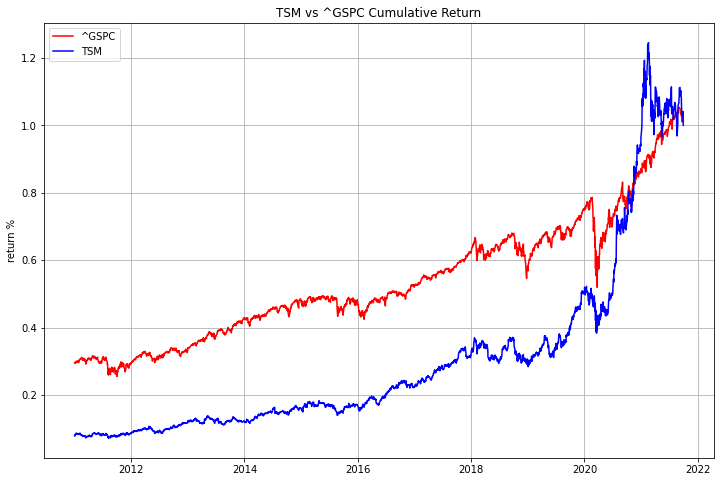

In [43]:
# Plot stock performance against S&P 500 index
fig, ax = plt.subplots(figsize=(12,8))
plt.plot((1+historical_sp['daily_ret']).cumprod(), label =f'{index}', color='r')
ax.set_title(f'{company} vs {index} Cumulative Return')
ax.set_ylabel('return %')
ax.legend(loc='upper left')
plt.grid()

plt.plot((1+historical['daily_ret']).cumprod(), label ='TSM', color='b')
ax.legend(loc='upper left')

# Company Quote and P/E

In [44]:
# Pull latest stock quote and stats
url = f'https://financialmodelingprep.com/api/v3/quote/{company}?apikey={FMP_API_KEY}'
stock_quote = requests.get(url).json()
stock_quote = pd.DataFrame(stock_quote)
timestamp = stock_quote['timestamp']
dt_obj = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
stock_quote['date'] = dt_obj
stock_quote.set_index('date', inplace=True)
stock_quote

,symbol,name,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,marketCap,...,volume,avgVolume,exchange,open,previousClose,eps,pe,earningsAnnouncement,sharesOutstanding,timestamp
date,,,,,,,,,,,,,,,,,,,,,
2021-09-30,TSM,Taiwan Semiconductor Manufacturing Company Lim...,111.65,0.026876,0.029999,111.65,113.35,142.2,80.61,5.790258e+11,...,6286854,7967595,NYSE,112.43,111.62,3.84,29.075521,None,5186079981,1633057072


# Industry P/E

In [45]:
date = '2021-09-30' # change the date to latest or desired date
exchange = 'NYSE' # change to 'NASDAQ' to obtain P/E for that exchange

In [46]:
# Get industry P/E
url = f'https://financialmodelingprep.com/api/v4/industry_price_earning_ratio?date={date}&exchange={exchange}&apikey={FMP_API_KEY}'
industry_stats = requests.get(url).json()
industry_stats = pd.DataFrame(industry_stats)
industry_stats['date'] = pd.to_datetime(industry_stats['date'])
industry_stats= industry_stats.set_index('date')
industry_stats

,industry,exchange,pe
date,,,
2021-09-30,Auto Manufacturers,NYSE,123.080815902422628
2021-09-30,Banks—Diversified,NYSE,36.5913514264137021
2021-09-30,Closed-End Fund - Foreign,NYSE,5.45925476666666665
2021-09-30,Computer Hardware,NYSE,95.0027298302083096
2021-09-30,Drug Manufacturers—General,NYSE,58.9411417559523798
2021-09-30,Household & Personal Products,NYSE,29.493439558750012
2021-09-30,Internet Content & Information,NYSE,40.6266967385965003
2021-09-30,Oil & Gas Midstream,NYSE,34.9171148522935724
2021-09-30,Other Industrial Metals & Mining,NYSE,47.1682483778625894


# Sector P/E

In [47]:
# Get sector P/E
url = f'https://financialmodelingprep.com/api/v4/sector_price_earning_ratio?date={date}&exchange={exchange}&apikey={FMP_API_KEY}'
sector_stats = requests.get(url).json()
sector_stats = pd.DataFrame(sector_stats)
sector_stats['date'] = pd.to_datetime(sector_stats['date'])
sector_stats= sector_stats.set_index('date')
sector_stats

,sector,exchange,pe
date,,,
2021-09-30,Basic Materials,NYSE,47.1682483778625894
2021-09-30,Communication Services,NYSE,40.6266967385965003
2021-09-30,Consumer Cyclical,NYSE,123.080815902422628
2021-09-30,Consumer Defensive,NYSE,29.493439558750012
2021-09-30,Energy,NYSE,34.9171148522935724
2021-09-30,Financial Services,NYSE,36.5913514264137021
2021-09-30,Healthcare,NYSE,58.9411417559523798
2021-09-30,Industrials,NYSE,57.2884549263566143
2021-09-30,Real Estate,NYSE,82.1839955675977762


In [48]:
# Print company, sector and industry P/E to compare and determine if over- or under-valued
company_pe = stock_quote['pe']
industry_pe = industry_stats.loc[industry_stats['industry'] == 'Computer Hardware']
sector_pe = sector_stats.loc[sector_stats['sector'] == 'Technology']
print(f'{company} P/E = {company_pe}')
print(industry_pe)
print(sector_pe)

TSM P/E = date
2021-09-30    29.075521
Name: pe, dtype: float64
                     industry exchange                   pe
date                                                       
2021-09-30  Computer Hardware     NYSE  95.0027298302083096
                sector exchange                   pe
date                                                
2021-09-30  Technology     NYSE  95.0027298302083096


# Institutional Holders

In [49]:
# List of institutional holders
url = f'https://financialmodelingprep.com/api/v3/institutional-holder/{company}?apikey={FMP_API_KEY}'
institutional_holders = requests.get(url).json()
institutional_holders = pd.DataFrame(institutional_holders)
institutional_holders = institutional_holders.sort_values(by='shares',ascending=False)
print(institutional_holders[:20])

                                        holder    shares dateReported   change
1234                      SANDERS CAPITAL, LLC  40434002   2021-06-30  1391488
1233                   CAPITAL WORLD INVESTORS  35567322   2021-06-30  -708068
1232                       JPMORGAN CHASE & CO  35021753   2021-06-30 -1100952
1231           CAPITAL INTERNATIONAL INVESTORS  34607357   2021-06-30  1421474
1230              BANK OF NEW YORK MELLON CORP  34453724   2021-06-30  -617423
1229  MASSACHUSETTS FINANCIAL SERVICES CO /MA/  33364658   2021-06-30  -218353
1228              FISHER ASSET MANAGEMENT, LLC  25981273   2021-06-30  -658898
1227            WCM INVESTMENT MANAGEMENT, LLC  25822944   2021-06-30 -6119494
1226                        VANGUARD GROUP INC  21532029   2021-06-30 -1603011
1225                        FIERA CAPITAL CORP  15693545   2021-06-30  -209155
1224           WELLINGTON MANAGEMENT GROUP LLP  15326412   2021-06-30 -5526601
1223                            BLACKROCK INC.  1477

In [50]:
# Sum of the shares held by institutions and net change
institutional_holders.sum()

holder          SANDERS CAPITAL, LLCCAPITAL WORLD INVESTORSJPM...
shares                                                  867210058
dateReported    2021-06-302021-06-302021-06-302021-06-302021-0...
change                                                  -21491908
dtype: object